# Grouping Data

## Table of Contents

- [Quick Example](#quick-example)
- [UN Comtrade Data Explanation](#un-comtrade-data-explanation)
  - [UN Comtrade API](#un-comtrade-api)
  - [Exercise 1: Getting Comtrade data into your notebook](#exercise-1-getting-comtrade-data-into-your-notebook)
- [Split Appy Combine Pattern](#split-appy-combine-pattern)
  - [Grouping Example](#grouping-example)
  - [Exericse 2](#exercise-2)
  - [Exercise 3](#exercise-3)
- [Filtering Groups](#filtering-groups)
  - [Exercise 4](#exercise-4)
- [Interactive Pivot Table](#interactive-pivot-table)
  - [Exercise 5](#exercise-5)
- [Pandas Pivot Tables](#pandas-pivot-tables)
  - [Exercise 6](#exercise-6)

## Quick Example

Grouping data then running a function on the group.



In [263]:
import pandas as pd
print(pd.__version__)

1.4.4


In [264]:
YEAR = 2013
GDP_INDICATOR = 'NY.GDP.MKTP.CD'
gdp = pd.read_csv('./mock_data.csv')
gdp

,country,year,NY.GDP.MKTP.CD
0,China,2013,9.490603e+12
1,China,2012,8.461623e+12
2,China,2011,7.492432e+12
3,China,2010,6.039659e+12
4,China,2009,5.059420e+12
5,China,2008,4.558431e+12
6,United Kingdom,2013,2.678173e+12
7,United Kingdom,2012,2.614946e+12
8,United Kingdom,2011,2.592016e+12
9,United Kingdom,2010,2.407857e+12


Datasets in a single table can often be thought of as containing several distinct subsets of data. In the example below, the country and year columns contain multiple of the same value. 

This suggests we can make different sorts of comparisons between different groupings of data using just this dataset.

Eg. we could compare the total GDP of each country calculated over the six years 2008 to 2013 using a single line of code.

In [265]:
gdp.groupby('country')[GDP_INDICATOR].aggregate(sum)

country
China             4.110217e+13
United Kingdom    1.539367e+13
Name: NY.GDP.MKTP.CD, dtype: float64

What this does is "for each country, find the total GDP". Or, group all rows with the same country together, select the GDP column, aggregate and run a function on the aggregated GDP data, in this case sum (add it all together).

- `groupby` will group values that are the same in the given column together.
- `aggregate` is used to do something to a given column in the grouped data. In this case, add the values in that column together.

We could also group this data by year.

## UN Comtrade Data Explanation

[UN Comtrade](https://comtradeplus.un.org/)

NOTE: read codes explicitly as strings (dtype) or leading 0's are lost.

NOTE: values in $US 

### Explanation and examples

```py
filename='file.csv'

pd.read_csv(filename, dtype={'Commodity Code':str, 'Reporter Code':str })
```

The data may contain lots of columns we don't need for our purposes. 

```py
COLUMNS = ['Year', 'Period','Trade Flow','Reporter','Partner', 'Commodity','Commodity Code','Trade Value (US$)']

df = df[COLUMNS]
```

To avoid conflating data relating to all countries (the "World" partner), and each seperate country, create separate dataframes for each, using comparison operators.

```py
world = df[df['Partner'] == 'World']
countries = df[df['Partner' != 'World']]
```

#### UN Comtrade API

You can download data directly into your project using the API URL. When you use the site/form to get the data, it will provide a URL to use (it creates it from what you request in the form).

For our purpose, we need to modify this URL. 

1. Change max value to 5000 to increase the amount of data returned by each request. 
2. Add `&fmt=csv` to the end of the url so we get the CSV format.

```py
URL='http://comtrade.un.org/api/get?max=5000&type=C&freq=A&px=HS&ps=2014%2C2013%2C2012&r=826&p=all&rg=all&cc=0401%2C0402&fmt=csv'

df = pd.read_csv(URL, dtype={'Commodity Code':str, 'Reporter Code':str})
```

#### Save copy of dataframe

You can save the data read into pandas by calling `to_csv` on your dataFrame. You can do this any time you want to save a dataFrame into a csv file.

To stop the pandas added indexes (the default numbered rows) include `index=False`.

```py
df.to_csv('filename.csv', index=False) 
```

### Exercise 1: Getting Comtrade data into your notebook

FIX: I had to add the encoding when reading the csv, as seen in the cell below. In most cases both the encodings below can be used interchangably, they refer to the same kind of encoding.

In [266]:
LOCATION = './uk_milk_export_import.csv'
milk = pd.read_csv(LOCATION, dtype={'CmdCode':str}, encoding='ISO-8859-1')
# milk = pd.read_csv(LOCATION, dtype={'CmdCode':str}, encoding='Latin-1')
milk.head(3)

,TypeCode,FreqCode,RefPeriodId,RefYear,RefMonth,Period,ReporterCode,ReporterISO,ReporterDesc,FlowCode,...,IsNetWgtEstimated,GrossWgt,IsGrossWgtEstimated,Cifvalue,Fobvalue,PrimaryValue,LegacyEstimationFlag,IsReported,IsAggregate,Unnamed: 47
0,C,M,20140501,2014,5,201405,826,GBR,United Kingdom,M,...,False,0,False,2.166566e+07,0.0,2.166566e+07,0,False,True,NaN
1,C,M,20140601,2014,6,201406,826,GBR,United Kingdom,M,...,False,0,False,1.602243e+07,0.0,1.602243e+07,0,False,True,NaN
2,C,M,20141001,2014,10,201410,826,GBR,United Kingdom,M,...,False,0,False,1.835310e+07,0.0,1.835310e+07,0,False,True,NaN


Select columns. The names are different to the example given by openlearn. I've selected what I think are the correct columns.

In [267]:
# milk.columns
# COLUMNS = ['Year', 'Period','Trade Flow','Reporter', 'Partner', 'Commodity','Commodity Code','Trade Value (US$)']
# milk = milk[COLUMNS]

COLUMNS = ['RefYear', 'Period', 'FlowDesc', 'ReporterDesc', 'PartnerDesc', 'CmdCode', 'CmdDesc', 'Cifvalue', 'PrimaryValue']

milk = milk[COLUMNS]
milk.head(3)

,RefYear,Period,FlowDesc,ReporterDesc,PartnerDesc,CmdCode,CmdDesc,Cifvalue,PrimaryValue
0,2014,201405,Import,United Kingdom,World,0401,"Milk and cream; not concentrated, not containi...",2.166566e+07,2.166566e+07
1,2014,201406,Import,United Kingdom,World,0401,"Milk and cream; not concentrated, not containi...",1.602243e+07,1.602243e+07
2,2014,201410,Import,United Kingdom,World,0401,"Milk and cream; not concentrated, not containi...",1.835310e+07,1.835310e+07


### Cifvalue vs Primary Value

#### NOTE: CIF Value (Cost, Insurance, and Freight):

CIF value represents the total value of goods including their cost, insurance, and freight charges up to the port or point of entry in the importing country. It includes the cost of the goods, insurance charges, and the cost of freight or transport up to the point of destination.

Primary Value is not a standarized terminology in trade.

In this dataset, the `Cifvalue` and `PrimaryValue` are sometimes the same but mostly not.

In [268]:
(milk['Cifvalue'] == milk['PrimaryValue']).sum()

359

### Subsetting The Data

I'll create subsets. All imports, imports from Wolrd, imports from countries.

In [269]:
milk_world = milk[milk['PartnerDesc'] == 'World']
milk_countries = milk[milk['PartnerDesc'] != 'World']

In [270]:
milk_imports = milk[milk['FlowDesc'] == 'Import']
milk_world_imports = milk_world[milk_world['FlowDesc'] == 'Import']
milk_countries_imports = milk_countries[milk_countries['FlowDesc'] == 'Import']

print(len(milk_imports), len(milk_world_imports), len(milk_countries_imports))

359 24 335


### Sorting Data

Having loaded in the data, find the most valuable partners in terms of import trade flow during a particular month by sorting the data by *decreasing* trade value and then selecting the top few rows.

In [271]:
milkImportsInJanuary2014 = milk_countries_imports[milk_countries_imports['Period'] == 201401]
top_trade_partners = milkImportsInJanuary2014.sort_values('PrimaryValue',ascending=False)
top_trade_partners.head(3)

,RefYear,Period,FlowDesc,ReporterDesc,PartnerDesc,CmdCode,CmdDesc,Cifvalue,PrimaryValue
705,2014,201401,Import,United Kingdom,Ireland,0401,"Milk and cream; not concentrated, not containi...",1.067614e+07,1.067614e+07
442,2014,201401,Import,United Kingdom,France,0402,Milk and cream; concentrated or containing add...,8.020014e+06,8.020014e+06
671,2014,201401,Import,United Kingdom,Ireland,0402,Milk and cream; concentrated or containing add...,5.966962e+06,5.966962e+06


#### My own practise task

Who are the UK's top trade partners by import.

In [272]:
top_3 = top_trade_partners.groupby('PartnerDesc')['PrimaryValue'].aggregate(sum).sort_values(ascending=False)[0:3]
top_3.apply(lambda x: '{:,.2f}'.format(x))

PartnerDesc
Ireland    16,643,099.55
France      9,542,886.01
Belgium     8,056,386.78
Name: PrimaryValue, dtype: object

## Split Appy Combine Pattern

- **split** an appropriately shaped dataset into several components
- **apply** an operator to the rows contained within a component
- **combine** the results of applying to operator to each component to return a single combined result.

### Grouping Example

This may seem to you like a roundabout way of filtering the dataframe as you did in Week 2; but you’ll see that the ability to automatically group rows sets up the possibility of then processing those rows as separate ‘mini-dataframes’ and then combining the results back together.

#### Single column grouped

In [273]:
data = [
  ['A', 10, 2020], ['A', 15, 2021], ['A', 5, 2021], 
  ['A', 20, 2020], ['B', 10, 2020], ['B', 10, 2020], 
  ['B', 5, 2021], ['C', 20, 2020], ['C', 30, 2021]
]

df = pd.DataFrame(data=data, columns=["Commodity", "Amount", "Year"])
df.head(8).tail(-3)

,Commodity,Amount,Year
3,A,20,2020
4,B,10,2020
5,B,10,2020
6,B,5,2021
7,C,20,2020


In [274]:
grouped = df.groupby('Commodity')
grouped.groups.keys()

dict_keys(['A', 'B', 'C'])

In [275]:
grouped.get_group('B')

,Commodity,Amount,Year
4,B,10,2020
5,B,10,2020
6,B,5,2021


#### Multiple columns grouped

In [276]:
grouped = df.groupby(['Commodity', 'Year'])
grouped.groups.keys()

dict_keys([('A', 2020), ('A', 2021), ('B', 2020), ('B', 2021), ('C', 2020), ('C', 2021)])

In [277]:
grouped.get_group(('A', 2020))

,Commodity,Amount,Year
0,A,10,2020
3,A,20,2020


### Exercise

#### Total imports & exports for France

In [278]:
partner_flow_group = milk.groupby(['PartnerDesc', 'FlowDesc'])


In [279]:
total_exports_to_france = partner_flow_group.get_group(('France', 'Export'))['PrimaryValue'].aggregate(sum)

print('total_exports_to_france:', total_exports_to_france)

total_imports_from_france = partner_flow_group.get_group(('France', 'Import'))['PrimaryValue'].aggregate(sum)

print('total_imports_from_france:', total_imports_from_france)

total_exports_to_france: 34622981.327
total_imports_from_france: 105008174.849


I was wondering, given that 0401 is milk not concentrated (fresh?) or sweetened, 0402 is concentrated... (processed?). Does France import more of one and less of the other?

It looks like that is the case, it seems like they export more fresh milk and import more processed milk, by value.

In [280]:
parter_flow_comodity_group = milk.groupby(['PartnerDesc', 'FlowDesc', 'CmdCode'])
parter_flow_comodity_group.groups.keys()
print(parter_flow_comodity_group.get_group(('France', 'Export', '0401'))['PrimaryValue'].sum() / 1_000_000)
print(parter_flow_comodity_group.get_group(('France', 'Export', '0402'))['PrimaryValue'].sum() / 1_000_000)
print(parter_flow_comodity_group.get_group(('France', 'Import', '0401'))['PrimaryValue'].sum() / 1_000_000)
print(parter_flow_comodity_group.get_group(('France', 'Import', '0402'))['PrimaryValue'].sum() / 1_000_000)


25.597541051
9.025440276
19.376395765999998
85.631779083


#### Leading trade partner by commodity 

To find the leading partner for a particular commodity (import & export), group by commodity, get the desired group, and then sort the result.

In [281]:
groups = milk_countries.groupby(['CmdCode'])
groups.get_group('0402').sort_values('PrimaryValue', ascending=False).head()

,RefYear,Period,FlowDesc,ReporterDesc,PartnerDesc,CmdCode,CmdDesc,Cifvalue,PrimaryValue
61,2014,201406,Export,United Kingdom,Algeria,0402,Milk and cream; concentrated or containing add...,0.0,2.241156e+07
62,2014,201405,Export,United Kingdom,Algeria,0402,Milk and cream; concentrated or containing add...,0.0,1.965668e+07
55,2014,201404,Export,United Kingdom,Algeria,0402,Milk and cream; concentrated or containing add...,0.0,1.487582e+07
691,2014,201404,Export,United Kingdom,Ireland,0402,Milk and cream; concentrated or containing add...,0.0,1.171234e+07
693,2014,201403,Export,United Kingdom,Ireland,0402,Milk and cream; concentrated or containing add...,0.0,1.101547e+07


### Exercise 2

Using your own data set from Exercise 1, try to group the data in a variety of ways, finding the most significant trade partner in each case:

- by commodity, or commodity code
- by trade flow, commodity and year.

In [282]:
# Answer 1.
milk_countries_only = milk[milk['PartnerDesc'] != 'World']
partner_comodity_group =  milk_countries_only.groupby(['PartnerDesc', 'CmdCode'])
partner_comodity_group['PrimaryValue'].aggregate(sum).sort_values(ascending=False)


PartnerDesc  CmdCode
Ireland      0401       4.377182e+08
             0402       1.578261e+08
Netherlands  0402       1.090504e+08
France       0402       9.465722e+07
Algeria      0402       9.375384e+07
                            ...     
Luxembourg   0401       2.174160e+02
Estonia      0401       7.833400e+01
Croatia      0401       1.673800e+01
Bulgaria     0401       1.488700e+01
Slovenia     0401       1.140700e+01
Name: PrimaryValue, Length: 181, dtype: float64

In [283]:
# Answer 2.
parter_flow_comodity_year = milk_countries_only.groupby(['PartnerDesc', 'FlowDesc', 'CmdDesc', 'RefYear'])
parter_flow_comodity_year['PrimaryValue'].aggregate(sum).sort_values(ascending=False)

PartnerDesc  FlowDesc  CmdDesc                                                                                  RefYear
Ireland      Export    Milk and cream; not concentrated, not containing added sugar or other sweetening matter  2014       3.263386e+08
             Import    Milk and cream; not concentrated, not containing added sugar or other sweetening matter  2014       1.113796e+08
             Export    Milk and cream; concentrated or containing added sugar or other sweetening matter        2014       9.488987e+07
Algeria      Export    Milk and cream; concentrated or containing added sugar or other sweetening matter        2014       9.375384e+07
France       Import    Milk and cream; concentrated or containing added sugar or other sweetening matter        2014       8.563178e+07
                                                                                                                               ...     
Croatia      Export    Milk and cream; not concentrated, not con

I see from this output that the UK exports the most of both commodites to Ireland and imports the most of one of them from Ireland and the other from France.

NOTE: the year was irrelevant here as all data is from the same year.

### Apply and Combine operations

The operation often takes one of two forms:

- a **summary** operation, in which a summary statistic based on the rows contained within each group is generated. A single value is returned for each group, for example, the group median or mean, the number of rows in the group, or the maximum or minimum value in the group. The final result will have M rows, one for each of the M groups created by the split (that is, . groupby() ) operation.
- a **filtering** or **filtration** operation, in which groups of rows are retained or discarded based on a particular property of the group as a whole. For example, only groups of rows where the sum of all the values in the group is above some threshold are retained. The effect is that each group keeps the same number of rows, but the resulting dataset (after combination, see below) may contain fewer groups than the original.

The results of applying the summary or filtration operation are then combined to provide a single output dataframe.

#### Using Apply example

Where `aggregate()` can be used to do something to a group and return a single row. It can have multiple columns in the row, eg. sum, mean and max, or a single column.

You can also use `apply()` on a group, this could return more than one row per group. The original row index numbers are included (2nd row).

In [284]:
df

,Commodity,Amount,Year
0,A,10,2020
1,A,15,2021
2,A,5,2021
3,A,20,2020
4,B,10,2020
5,B,10,2020
6,B,5,2021
7,C,20,2020
8,C,30,2021


In [285]:
grouped = df.groupby('Commodity')
# grouped.aggregate(sum)
grouped.aggregate({'Amount': ['sum', 'mean', 'max']})

Amount               
             sum       mean max
Commodity                      
A             50  12.500000  20
B             25   8.333333  10
C             50  25.000000  30

In [286]:
def top2byAmount(g): 
  return g.sort_values('Amount', ascending=False).head(2)

grouped.apply(top2byAmount)

Commodity  Amount  Year
Commodity                          
A         3         A      20  2020
          1         A      15  2021
B         4         B      10  2020
          5         B      10  2020
C         8         C      30  2021
          7         C      20  2020

### Exercise 3

As you complete the tasks, think about these questions:

- For your dataset, which months saw the highest and lowest levels of trade activity? Did there appear to be any seasonal behaviour?
- When graphically comparing total trade flows from the leading partner countries to the World total, did it look as if any partners particularly dominated that area of trade? If you have time, find news reports discussing why this should be the case.

#### Aggregation operations – Generating *Summary* reports

To find the total value of imports traded for each commodity within the period, take the world dataframe, and sum the values over the trade value column within each grouping.

In [287]:
result = milk_world_imports.groupby('CmdCode')['PrimaryValue'].sum().apply(lambda x: f"{x / 1_000_000:.2f}")
print(result)


CmdCode
0401    222.11
0402    341.78
Name: PrimaryValue, dtype: object


Top trading partners.

In [288]:
milk_countries_only.groupby('PartnerDesc')['PrimaryValue'].aggregate(sum).sort_values(ascending=False)

PartnerDesc
Ireland        5.955443e+08
Netherlands    1.408583e+08
France         1.396312e+08
Germany        1.127093e+08
Algeria        9.375384e+07
                   ...     
Estonia        2.420812e+03
Latvia         2.335632e+03
Bulgaria       3.266620e+02
Croatia        3.157130e+02
Slovenia       1.140700e+01
Name: PrimaryValue, Length: 120, dtype: float64

#### Generating simple charts

One of the useful features of the `aggregate()` method is that it returns an object that can be plotted from directly, in this example a horizontal bar chart.

<AxesSubplot:ylabel='CmdCode'>

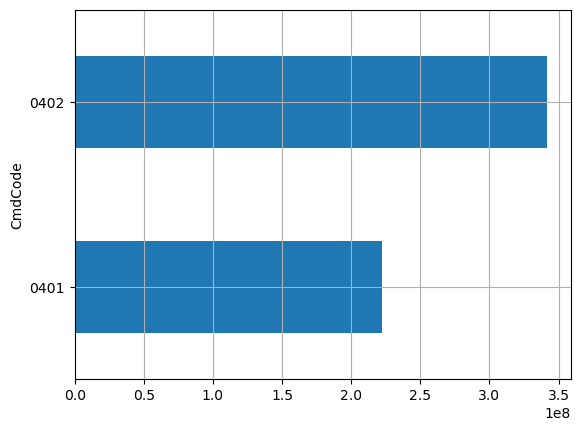

In [289]:
milk_countries_imports.groupby('CmdCode')['PrimaryValue'].aggregate(sum).plot(kind='barh', grid=True)

#### Generating alternative groupings

Reports can also be generated to show the total imports per month for each commodity: group on commodity, trade flow and period, and then sum the trade values contained within each group.

In [290]:
monthlies=milk_countries_imports.groupby(['CmdDesc','FlowDesc','Period'])['PrimaryValue'].aggregate(sum)
monthlies

CmdDesc                                                                                  FlowDesc  Period
Milk and cream; concentrated or containing added sugar or other sweetening matter        Import    201401    3.042333e+07
                                                                                                   201402    2.061451e+07
                                                                                                   201403    2.633526e+07
                                                                                                   201404    2.477034e+07
                                                                                                   201405    2.640946e+07
                                                                                                   201406    2.908188e+07
                                                                                                   201407    2.566864e+07
                                        

#### Generating several aggregation values at the same time

To generate several aggregate reports in a single line of code, provide a list of several aggregating operations to the `aggregate()` method:

NOTE: `mean` is available from `numpy`.

In [291]:
from numpy import mean

GROUPING_COMMFLOWPERIOD=['CmdDesc','FlowDesc','Period']
milk_countries.groupby(GROUPING_COMMFLOWPERIOD)['PrimaryValue'].aggregate([sum, min, max, mean])

sum  \
CmdDesc                                            FlowDesc Period                 
Milk and cream; concentrated or containing adde... Export   201401  4.021510e+07   
                                                            201402  3.229838e+07   
                                                            201403  4.298736e+07   
                                                            201404  5.290052e+07   
                                                            201405  5.598793e+07   
                                                            201406  5.959410e+07   
                                                            201407  3.337059e+07   
                                                            201408  3.508021e+07   
                                                            201409  2.732092e+07   
                                                            201410  3.038786e+07   
                                                            201411  2.341728e+07   
                                                            201412  3.130103e+07   
                                                   Import   201401  3.042333e+07   
                                                            201402  2.061451e+07   
                                                            201403  2.633526e+07   
                                                            201404  2.477034e+07   
                                                            201405  2.640946e+07   
                                                            201406  2.908188e+07   
                                                            201407  2.566864e+07   
                                                            201408  2.336079e+07   
                                                            201409  3.741816e+07   
                                                            201410  3.801244e+07   
                                                            201411  3.946535e+07   
                                                            201412  2.021701e+07   
Milk and cream; not concentrated, not containin... Export   201401  4.692355e+07   
                                                            201402  4.019134e+07   
                                                            201403  4.379407e+07   
                                                            201404  4.229526e+07   
                                                            201405  4.021321e+07   
                                                            201406  3.972180e+07   
                                                            201407  3.950813e+07   
                                                            201408  2.665749e+07   
                                                            201409  3.327938e+07   
                                                            201410  2.661556e+07   
                                                            201411  2.587667e+07   
                                                            201412  2.871421e+07   
                                                   Import   201401  2.195075e+07   
                                                            201402  1.868555e+07   
                                                            201403  1.798420e+07   
                                                            201404  1.944027e+07   
                                                            201405  2.166566e+07   
                                                            201406  1.602243e+07   
                                                            201407  1.912811e+07   
                                                            201408  1.693404e+07   
                                                            201409  1.928438e+07   
                                                            201410  1.835310e+07   
                                             

By combining different grouping combinations and aggregate functions, you can quickly ask a range of questions over the data or generate a wide variety of charts from it.

Sometimes, however,  it can be quite hard to see any 'outstanding' values in a complex pivot table. In such cases, a chart may help you see which values are significantly larger or smaller than the other values.

For example, plot the maximum value by month across each code/period combination to see which month saw the maximum peak flow of imports from a single partner.

<AxesSubplot:ylabel='CmdCode,Period'>

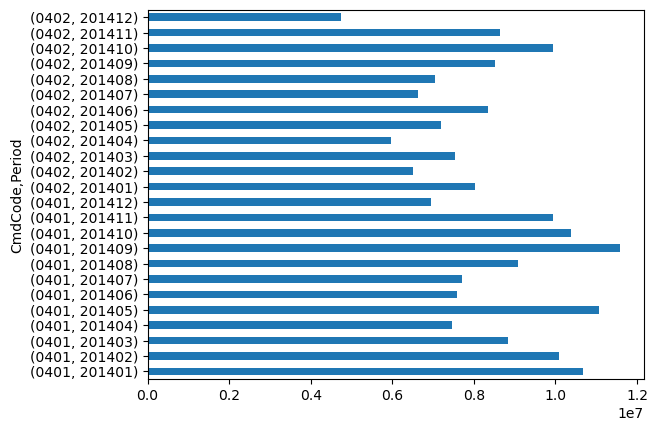

In [292]:
milk_countries_imports.groupby(['CmdCode','Period'])['PrimaryValue'].aggregate(max).plot(kind='barh')


In some cases, you might want to sort the order of the bars in a bar chart by value. By default, the `sort_values()` operator sorts a series or dataframe 'in place'. That is, it sorts the dataframe and doesn't return anything. Use the `inplace=False` parameter to return the sorted values so that the plot function can work on them.

The following chart displays the total imports for the combined commodities by partner (including the *World* partner) for the top five partners: the `sort_values()` element sorts the values in descending order, passes them to the `head()` element, which selects the top five and passes those onto the plotting function.

In [293]:
milk_bypartner_total=milk[milk["FlowDesc"]=='Import'].groupby('PartnerDesc')['PrimaryValue'].aggregate(sum)
milk_bypartner_total.head(5)


PartnerDesc
Austria    7.988162e+05
Belgium    5.833875e+07
Czechia    1.254989e+06
Denmark    3.053465e+07
Finland    1.157900e+01
Name: PrimaryValue, dtype: float64

In this case, we don't need to specify the column name when sorting because the aggregation operator returns a *pandas* `Series` and we can sort the values directly:

<AxesSubplot:ylabel='PartnerDesc'>

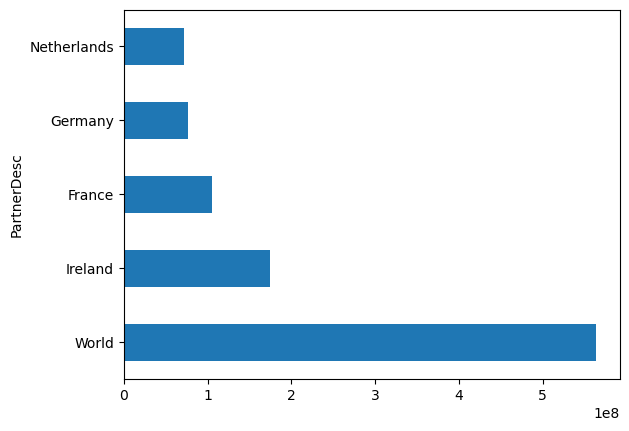

In [294]:
milk_bypartner_total.sort_values(ascending=False, inplace=False).head(5).plot(kind='barh')

### Tasks 3

For the 0402 trade item, which months saw the greatest average (mean) activity? How does that compare with the maximum flows in each month? How does it compare with the total flow in each month?

Download your own choice of monthly dataset over one or two years containing both import and export data. (To start with, you may find it convenient to split the data into two dataframes, one for exports and one for imports.)

Using your own data:

- find out which months saw the largest total value of imports, or exports? 
- assess, by eye, if there appears to be any seasonal trend in the behaviour of imports or exports?
- plot a bar chart showing the top three importers or exporters of your selected trade item over the period you grabbed the data for, compared to the total world trade value.


#### My answers

For the 0402 trade item:

1. which months saw the greatest average (mean) activity?
    
    June
    
2. How does that compare with the maximum flows in each month? 

    The average is very small compared to the max.

3. How does it compare with the total flow in each month?

    The average is very small compared to the total flow. The max is quite a big chunk of the total.

4. find out which months saw the largest total value of imports, or exports? 

    Apr, May, Jun had largest total value of exports. Sep, Oct, Nov had largest imports.

5. assess, by eye, if there appears to be any seasonal trend in the behaviour of imports or exports?

    See bar chart below.

6. plot a bar chart showing the top three importers or exporters of your selected trade item over the period you grabbed the data for, compared to the total world trade value.

    See second two charts below.

In [295]:
DIFF = 'max - mean'
single_com = milk[milk['CmdCode'] == '0402'].copy()
period_group = single_com.groupby('Period')['PrimaryValue'].aggregate([mean, max, sum]).apply(lambda x: (x / 1_000_000).round(1))
period_group[DIFF] = period_group['max'] - period_group['mean']

# period_group.sort_values('mean', ascending=False)
period_group

,mean,max,sum,max - mean
Period,,,,
201401,2.0,40.2,141.3,38.2
201402,1.6,32.3,105.8,30.7
201403,2.1,43.0,138.6,40.9
201404,2.3,52.9,155.3,50.6
201405,2.2,56.0,164.8,53.8
201406,2.4,59.6,177.4,57.2
201407,1.6,33.4,118.1,31.8
201408,1.6,35.1,116.9,33.5
201409,1.7,37.4,129.5,35.7


<AxesSubplot:xlabel='Period'>

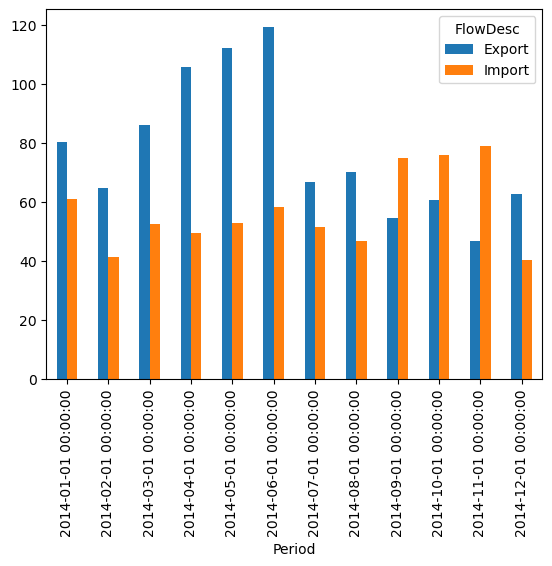

In [296]:
single_com['Period'] = pd.to_datetime(single_com['Period'], format='%Y%m')

period_flow_groups = single_com.groupby(['Period', 'FlowDesc'])['PrimaryValue'].aggregate(sum).apply(lambda x: x / 1_000_000).round(2).unstack()

period_flow_groups.plot(kind='bar')



In [297]:
imports = single_com[single_com['FlowDesc'] == 'Import']
exports = single_com[single_com['FlowDesc'] == 'Export']

Text(0.5, 1.0, 'Top Exports')

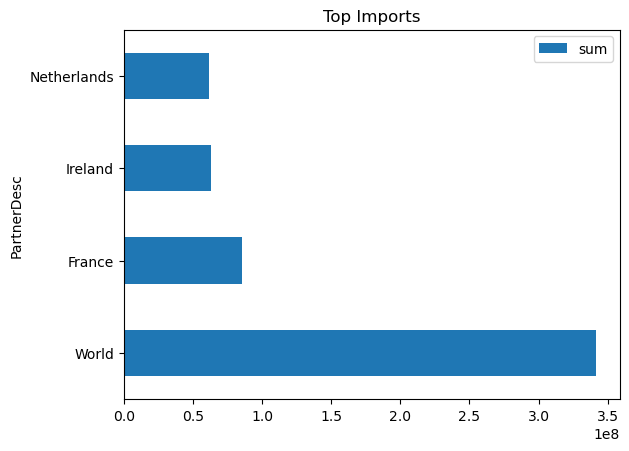

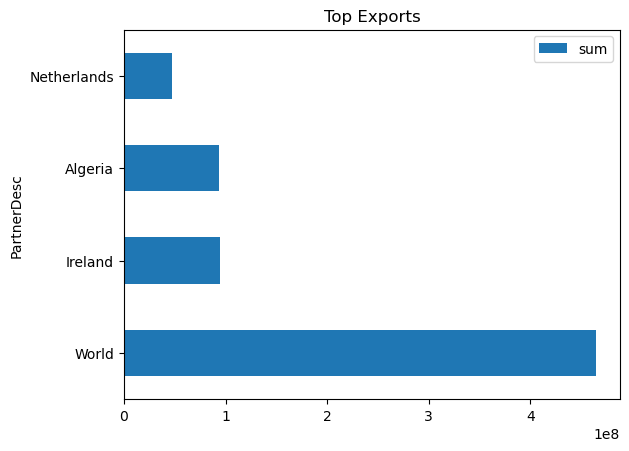

In [298]:
imports_top_3_and_world = imports.groupby('PartnerDesc')['PrimaryValue'].agg([sum]).sort_values('sum', ascending=False)[:4]
imports_top_3_and_world.plot(kind='barh').set_title('Top Imports')

export_top_3_and_world = exports.groupby('PartnerDesc')['PrimaryValue'].agg([sum]).sort_values('sum', ascending=False)[:4]
export_top_3_and_world.plot(kind='barh').set_title('Top Exports')

## Filtering Groups

If you have a large dataset that can be split into multiple groups but for which you only want to report on groups that have a particular property, the `filter()` method can be used to apply a test to a group and only return rows from groups that pass a particular group-wide test. If the test evaluates as `False`, the rows included in that group will be ignored.

### Examples

In [299]:
df

,Commodity,Amount,Year
0,A,10,2020
1,A,15,2021
2,A,5,2021
3,A,20,2020
4,B,10,2020
5,B,10,2020
6,B,5,2021
7,C,20,2020
8,C,30,2021


In [300]:
grouped = df.groupby('Commodity')

grouped.aggregate(len) # len is how many rows in each group (looks like)

,Amount,Year
Commodity,,
A,4,4
B,3,3
C,2,2


In [301]:
def groupsOfAtMostThreeRows(g): 
  return len(g) <= 3 

grouped.filter(groupsOfAtMostThreeRows)

,Commodity,Amount,Year
4,B,10,2020
5,B,10,2020
6,B,5,2021
7,C,20,2020
8,C,30,2021


In [302]:
grouped.aggregate(sum)

,Amount,Year
Commodity,,
A,50,8082
B,25,6061
C,50,4041


### Another Example

Group by commodity and trade partner, filter the groups where the Primary values add up to over 25 million.

`rows` will show the original table but without the rows that were part of the removed groups. It does not show the grouped data, group it again and aggregate to see that.

In [303]:
def groupsWithImportsOver25million(g):
  return g['PrimaryValue'].sum() > 25000000

rows = milk_countries_imports.groupby(['CmdDesc','PartnerDesc']).filter(groupsWithImportsOver25million)

rows

,RefYear,Period,FlowDesc,ReporterDesc,PartnerDesc,CmdCode,CmdDesc,Cifvalue,PrimaryValue
134,2014,201408,Import,United Kingdom,Belgium,0402,Milk and cream; concentrated or containing add...,2059585.275,2059585.275
136,2014,201401,Import,United Kingdom,Belgium,0402,Milk and cream; concentrated or containing add...,3584037.652,3584037.652
137,2014,201402,Import,United Kingdom,Belgium,0402,Milk and cream; concentrated or containing add...,1822452.111,1822452.111
138,2014,201407,Import,United Kingdom,Belgium,0402,Milk and cream; concentrated or containing add...,2839498.693,2839498.693
139,2014,201405,Import,United Kingdom,Belgium,0402,Milk and cream; concentrated or containing add...,1967144.342,1967144.342
...,...,...,...,...,...,...,...,...,...
975,2014,201403,Import,United Kingdom,Netherlands,0402,Milk and cream; concentrated or containing add...,3849204.554,3849204.554
977,2014,201404,Import,United Kingdom,Netherlands,0402,Milk and cream; concentrated or containing add...,5179295.345,5179295.345
982,2014,201411,Import,United Kingdom,Netherlands,0402,Milk and cream; concentrated or containing add...,8630781.459,8630781.459
983,2014,201409,Import,United Kingdom,Netherlands,0402,Milk and cream; concentrated or containing add...,6187630.147,6187630.147


In [304]:
rows.groupby(['CmdDesc','PartnerDesc'])['PrimaryValue'].aggregate(sum)


CmdDesc                                                                                  PartnerDesc
Milk and cream; concentrated or containing added sugar or other sweetening matter        Belgium        3.615541e+07
                                                                                         France         8.563178e+07
                                                                                         Germany        5.977696e+07
                                                                                         Ireland        6.293625e+07
                                                                                         Netherlands    6.153171e+07
Milk and cream; not concentrated, not containing added sugar or other sweetening matter  Denmark        2.943261e+07
                                                                                         Ireland        1.113796e+08
Name: PrimaryValue, dtype: float64

<AxesSubplot:ylabel='CmdDesc,PartnerDesc'>

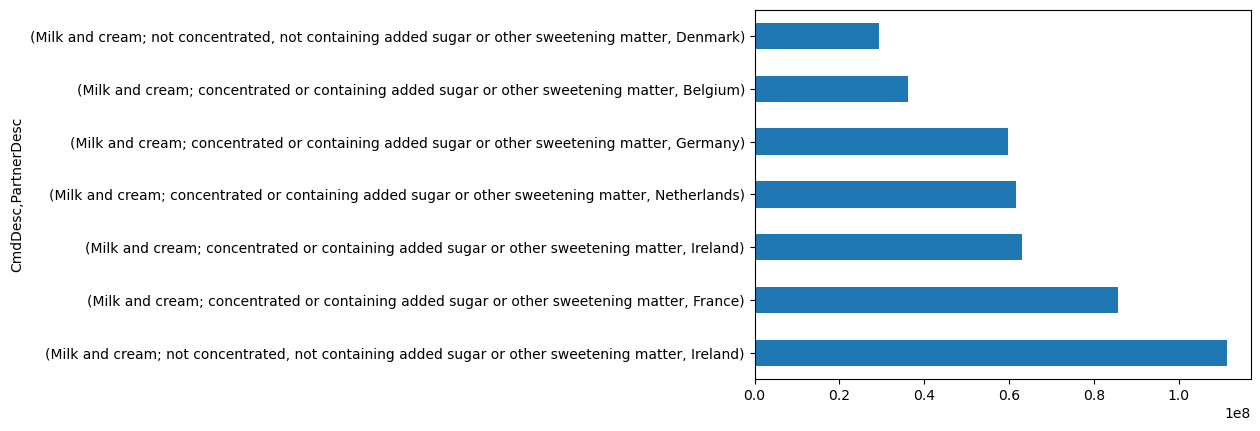

In [305]:
rows.groupby(['CmdDesc','PartnerDesc'])['PrimaryValue'].aggregate(sum).sort_values(inplace=False,ascending=False).plot(kind='barh')

Logical tests can be combined in a filter function (using `&` or `|`), for example testing for partners that only appear to trade infrequently *or* for small total amounts in any particular commodity.

In [306]:
milk_countries_imports.head()

,RefYear,Period,FlowDesc,ReporterDesc,PartnerDesc,CmdCode,CmdDesc,Cifvalue,PrimaryValue
93,2014,201410,Import,United Kingdom,Austria,0402,Milk and cream; concentrated or containing add...,423017.914,423017.914
97,2014,201409,Import,United Kingdom,Austria,0402,Milk and cream; concentrated or containing add...,230809.386,230809.386
103,2014,201411,Import,United Kingdom,Austria,0402,Milk and cream; concentrated or containing add...,144988.930,144988.930
134,2014,201408,Import,United Kingdom,Belgium,0402,Milk and cream; concentrated or containing add...,2059585.275,2059585.275
136,2014,201401,Import,United Kingdom,Belgium,0402,Milk and cream; concentrated or containing add...,3584037.652,3584037.652


In [307]:
def weakpartner(g):
    # return len(g) <= 3 | g['PrimaryValue'].sum() < 25000
    return len(g) <= 3 or g['PrimaryValue'].sum() < 25000 # 'or' had to be used instead of '|'

weak_milk_countries_imports = milk_countries_imports.groupby(['CmdDesc','PartnerDesc']).filter(weakpartner)
weak_milk_countries_imports.groupby(['CmdDesc','PartnerDesc'])[['PrimaryValue']].aggregate([len,sum])


PrimaryValue  \
                                                                                 len   
CmdDesc                                            PartnerDesc                         
Milk and cream; concentrated or containing adde... Austria                         3   
                                                   Greece                          1   
                                                   Hungary                         8   
                                                   Latvia                          1   
                                                   Luxembourg                      1   
                                                   New Zealand                     1   
                                                   USA                             2   
                                                   United Arab Emirates            2   
Milk and cream; not concentrated, not containin... Czechia                         2   
                                                   Finland                         1   
                                                   Latvia                          4   
                                                   Slovakia                        3   
                                                   Spain                           1   
                                                   USA                             1   
                                                   Ukraine                         1   

                                                                                     
                                                                                sum  
CmdDesc                                            PartnerDesc                       
Milk and cream; concentrated or containing adde... Austria               798816.230  
                                                   Greece                     6.740  
                                                   Hungary                 4956.790  
                                                   Latvia                   432.167  
                                                   Luxembourg             23723.540  
                                                   New Zealand            19290.731  
                                                   USA                     4374.301  
                                                   United Arab Emirates    5778.408  
Milk and cream; not concentrated, not containin... Czechia                76402.652  
                                                   Finland                   11.579  
                                                   Latvia                  1678.833  
                                                   Slovakia               89614.730  
                                                   Spain                     67.544  
                                                   USA                     2415.337  
                                                   Ukraine                 3733.259

### Exercise 4

I will answer each of the following questions in turn:

Filter the dataset so that it only contains rows where the total exports across all the milk products for a particular country are at least two million dollars in any given monthly period. (HINT: group on partner and period and filter against a function that tests the minimum trade value exceeds the required value.)

Generate a chart from that dataset that displays the sum total trade value for each partner. (HINT: group on the partner and then aggregate on the sum.)

Using your own monthly data for a single year, which countries only trade in your selected trade item rarely or for small amounts? Which partners trade on a regular basis (for example, in at least nine of the months)? 

Can you also find countries that trade regularly but only for small amounts (for example whose maximum monthly trade value is less than a certain threshold amount) or who trade infrequently but for large amounts (or other combinations thereof)?

#### Answers

Filter the dataset so that it only contains rows where the total exports across all the milk products for a particular country are at least two million dollars in any given monthly period. (HINT: group on partner and period and filter against a function that tests the minimum trade value exceeds the required value.)

In [308]:
def overTwoMillion (group):
  return group['PrimaryValue'].agg(sum) >= 2_000_000

exports = milk[milk['FlowDesc'] == 'Export']
exports_over_two_million = exports.groupby(['Period', 'PartnerDesc', 'CmdDesc']).filter(overTwoMillion)


Generate a chart from that dataset that displays the sum total trade value for each partner. (HINT: group on the partner and then aggregate on the sum.)

NOTE: I spread the data out using logx (logarithmic scale on the x axis).

Text(0.5, 1.0, 'Total Exports All Milk')

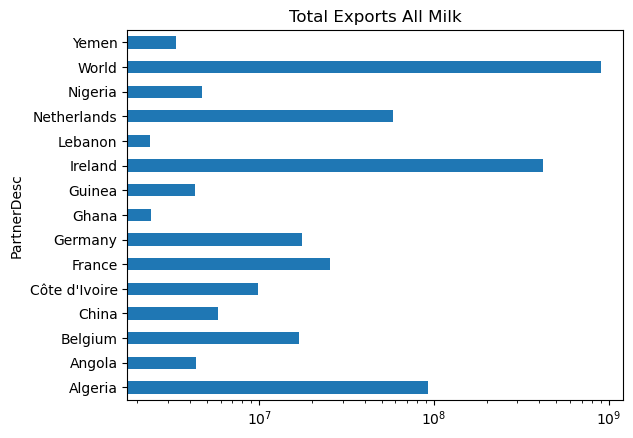

In [309]:
exports_over_two_million.groupby('PartnerDesc')['PrimaryValue'].agg(sum).plot(kind='barh', logx=True).set_title('Total Exports All Milk')

Using your own monthly data for a single year, which countries only trade in your selected trade item rarely or for small amounts? Which partners trade on a regular basis (for example, in at least nine of the months)? 

In [310]:
cmd0401 = milk[milk['CmdCode'] == '0401']
# cmd0401.groupby['PartnerDesc'] 

def low_volume(group):
  return len(group) <= 3 or group['PrimaryValue'].agg(sum) < 30_000

low_volume_countries = cmd0401.groupby('PartnerDesc').filter(low_volume)
group_agg = low_volume_countries.groupby('PartnerDesc')['PrimaryValue'].agg([sum])
group_counts = low_volume_countries.groupby('PartnerDesc').size()

group_agg['GroupCount'] = group_counts
group_agg.head(8)



,sum,GroupCount
PartnerDesc,,
Antigua and Barbuda,18654.351,4
Australia,14237.907,3
Austria,5647.848,10
Bahrain,9968.887,3
Barbados,6114.704,2
Bermuda,6936.511,4
Bulgaria,14.887,1
Cayman Isds,3592.264,1


In [311]:
def high_volume(g):
  return len(g) >= 9

high_volume_countries = cmd0401.groupby('PartnerDesc').filter(high_volume)

high_countries_agg = high_volume_countries.groupby('PartnerDesc')['PrimaryValue'].agg([sum])
month_counts = high_volume_countries.groupby('PartnerDesc').size()

high_countries_agg['MonthTradedCount'] = month_counts
high_countries_agg.head(8)

,sum,MonthTradedCount
PartnerDesc,,
Austria,5.647848e+03,10
Belgium,4.522512e+07,24
Canada,3.196007e+05,9
China,1.180622e+07,12
"China, Hong Kong SAR",4.323589e+06,12
Cyprus,2.455291e+05,12
Denmark,3.049189e+07,24
Falkland Isds (Malvinas),3.661520e+05,11


Can you also find countries that trade regularly but only for small amounts (for example whose maximum monthly trade value is less than a certain threshold amount)

In [312]:


high_countries_agg[high_countries_agg['sum'] < 100_000]

,sum,MonthTradedCount
PartnerDesc,,
Austria,5647.848,10
Greece,27257.380,10
Hungary,43429.370,12
Japan,95439.827,10
Lithuania,95150.325,17
South Africa,93178.734,10


Or who trade infrequently but for large amounts (or other combinations thereof)?

In [313]:
def low_volume(group):
  return len(group) <= 6 and group['PrimaryValue'].agg(sum) > 100_000

low_volume_countries = cmd0401.groupby('PartnerDesc').filter(low_volume)
group_agg = low_volume_countries.groupby('PartnerDesc')['PrimaryValue'].agg([sum])
group_counts = low_volume_countries.groupby('PartnerDesc').size()

group_agg['MonthsTraded'] = group_counts
group_agg.head(8)

,sum,MonthsTraded
PartnerDesc,,
Br. Virgin Isds,198009.504,6
Guatemala,200250.918,1
Guyana,311913.916,4
Malaysia,119522.020,2


## Interactive Pivot Table

The `pivottablejs` python package lets you create an interactive drag and drop pivot table. Its also a javaScript package?

The interactive pivot table contains a fragment of the milk data downloaded from Comtrade relating to the leading partner importers of milk products to the UK. (**Note:** If you can't see the pivot table, check you have downloaded it to the same folder as this notebook and run the cell below.)

Configure the pivot table by dragging the labels into the appropriate row and column selection areas. (You do not need to add all the labels to those areas). Select the aggregation type using the calculation list (which defauts to *count*). Click on the down arrow associated with a label in order to select a subset of values associated with that label.

Use the interactive pivot table to generate reports that display:

- a single column containing the total value of each trade flow for each commodity  each year (in rows: Year, Commodity, Trade Flow; no columns; sum Trade Value(US$))
- for each year and each commodity, a column containing the total trade value by Trade flow (rows: year, commodity; cols Trade Flow; sum trade value)
- the total exports for each partner country (rows) by year (columns). Row: partner, trade flow with filter set to export); col: year; sum trade value

In [314]:
# NOTE: this doesn't work in vscode but does in the browser

# from pivottablejs import pivot_ui

# pivot_ui(milk)


### Exercise 5

Try to come up with some of your own questions and then see if you can use the pivot table to answer them.

For example, see if you can use the table to find:

- the total value by partner country of each commodity type (with each row corresponding to a particular country)
- the total value of trade in commodity type for each month of the year
- the leading partners associated with the 0402 commodity code
- the minimum trade value, by month and commodity type, for Ireland.


## Pandas Pivot Tables

### Some practise data

In [315]:
#Example dataframe
df = pd.DataFrame(
  {
    "Commodity": ["A","A","A","A","B","B","B","C","C"], 
    "Amount":[10,15,5,20,10,10,5,20,30], 
    "Reporter":["P","P","Q","Q","P","P","Q","P","Q"], 
    "Flow":["X","Y","X","Y","X","Y","X","X","Y"]
  }, 
  columns=["Commodity","Reporter","Flow","Amount"])

df

,Commodity,Reporter,Flow,Amount
0,A,P,X,10
1,A,P,Y,15
2,A,Q,X,5
3,A,Q,Y,20
4,B,P,X,10
5,B,P,Y,10
6,B,Q,X,5
7,C,P,X,20
8,C,Q,Y,30


### Getting started with pivot tables in pandas 

The pandas library provides a `pivot_table()` function into which you can pass the elements needed to define the pivot table view you would like to generate over a particular dataset.

If you inspect the documentation for the pandas `pivot_table()` function, you will see that it is quite involved (but *DON'T PANIC!*).

In [316]:
# ?pd.pivot_table # this will show the documentation in the output below

You can start to use the pivot table quite straightforwardly, drawing inspiration from the way you configured the interactive pivot table. The function itself takes the form:

```py
pd.pivot_table(
  DATAFRAME,
  index= (LIST_OF_)DATA_COLUMN(S)_THAT_DEFINE_PIVOT_TABLE_ROWS,
  columns= (LIST_OF_)DATA_COLUMN(S)_THAT_DEFINE_PIVOT_TABLE_COLUMNS
  values= DATA_COLUMN_TO_APPLY_THE SUMMARYFUNCTION_TO,
  aggfunc=sum
)
```

You can generate a pivot table that shows the total trade value as a single column, grouped into row based subdivisions based on year, country, trade flow and commodity in the following way.

The following pivot table reports on a subset of countries. The `isin()` method selects rows whose partner value 'is in' the list of specified partners.

In [317]:
KEYPARTNERS = ['Belgium','France','Germany','Ireland','Netherlands','Denmark']
milk_keypartners = milk_countries[milk_countries['PartnerDesc'].isin(KEYPARTNERS)]

pd.pivot_table(
  milk_keypartners,
  index=['RefYear','PartnerDesc','FlowDesc','CmdCode'],
  values='PrimaryValue',
  aggfunc=sum
)


PrimaryValue
RefYear PartnerDesc FlowDesc CmdCode              
2014    Belgium     Export   0401     2.304178e+07
                             0402     6.301229e+06
                    Import   0401     2.218334e+07
                             0402     3.615541e+07
        Denmark     Export   0401     1.059285e+06
                             0402     1.849171e+06
                    Import   0401     2.943261e+07
                             0402     1.102036e+06
        France      Export   0401     2.559754e+07
                             0402     9.025440e+06
                    Import   0401     1.937640e+07
                             0402     8.563178e+07
        Germany     Export   0401     1.131095e+07
                             0402     2.478568e+07
                    Import   0401     1.683574e+07
                             0402     5.977696e+07
        Ireland     Export   0401     3.263386e+08
                             0402     9.488987e+07
                    Import   0401     1.113796e+08
                             0402     6.293625e+07
        Netherlands Export   0401     2.113041e+07
                             0402     4.751867e+07
                    Import   0401     1.067752e+07
                             0402     6.153171e+07

If you just want to use a single data column from the original dataset to specify the row (that is, the `index`) groupings or the column groupings, you don't need to use a list, just pass in the name of the appropriate original data column.

So, to look at rows grouped by year, country and commodity, and split columns out by trade flow:

In [318]:
# For convenience, let's assign the output of this pivot table operation to a variable...
report = pd.pivot_table(
  milk_keypartners,
  index=['RefYear','PartnerDesc','CmdCode'],
  columns='FlowDesc',
  values='PrimaryValue',
  aggfunc=sum
)

# And then display the result, sorted by import value
report.sort_values('Import', ascending=False)

FlowDesc                           Export        Import
RefYear PartnerDesc CmdCode                            
2014    Ireland     0401     3.263386e+08  1.113796e+08
        France      0402     9.025440e+06  8.563178e+07
        Ireland     0402     9.488987e+07  6.293625e+07
        Netherlands 0402     4.751867e+07  6.153171e+07
        Germany     0402     2.478568e+07  5.977696e+07
        Belgium     0402     6.301229e+06  3.615541e+07
        Denmark     0401     1.059285e+06  2.943261e+07
        Belgium     0401     2.304178e+07  2.218334e+07
        France      0401     2.559754e+07  1.937640e+07
        Germany     0401     1.131095e+07  1.683574e+07
        Netherlands 0401     2.113041e+07  1.067752e+07
        Denmark     0402     1.849171e+06  1.102036e+06

One of the features of the interactive pivot table you did not explore was its ability to generate bar chart style views over the pivoted data as well as tabulated results. (In fact, this requires a plugin to the pivot table that has not been installed.)

In the same way that you produced charts from pandas dataframes previously, you can visualise the contents of the dataframe produced from the pivot table operation.

<AxesSubplot:ylabel='RefYear,PartnerDesc,CmdCode'>

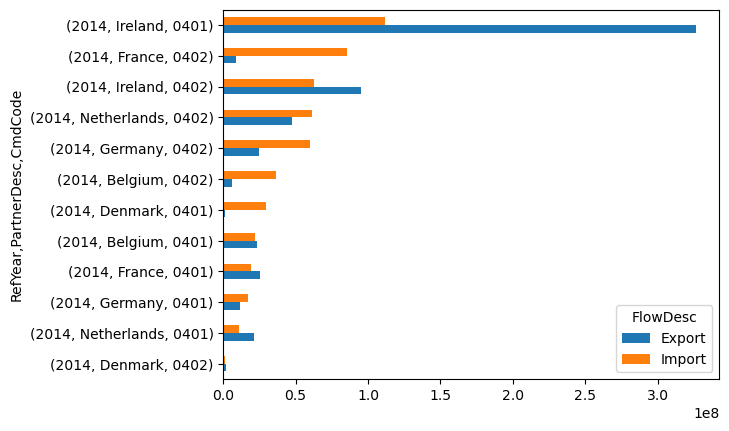

In [319]:
report.sort_values('Import').plot(kind='barh')

Here, the `.plot()` command produces a *grouped bar chart* with the bars grouped according to the order of the row index values. The values contained within any numerical columns are then displayed as bars.

### Exercise 6

Using your own data set containing data for both imports and exports of a particular trade item, see if you can use a pandas pivot table to answer the same questions you asked of your dataset in Exercise 5, as well as asking some new ones.

For example, try to use a pivot table to identify partner countries engaging in 'bi-derectional' trade who have total import values and export values greater than a certain threshold every month.

You can also use a pivot table in combination with other operations. For example, try using one of the filtered datasets you created using the `filter()` function, such as one that limited rows to partners trading above a certain level, as the basis for a pivot table report.

Q1. The total value by partner country of each commodity type (with each row corresponding to a particular country)

In [320]:
report = pd.pivot_table(
  milk,
  index=['PartnerDesc'],
  columns='CmdCode',
  values='PrimaryValue',
  aggfunc=sum
)

report.head()

CmdCode,0401,0402
PartnerDesc,,
Afghanistan,54523.693,NaN
Algeria,NaN,9.375384e+07
Angola,NaN,1.330582e+07
Antigua and Barbuda,18654.351,5.935151e+04
Australia,14237.907,8.873382e+04


Q2. The total value of trade in commodity type for each month of the year

In [349]:
report = pd.pivot_table(
  milk,
  index=['Period'],
  columns=['CmdCode'],
  values='PrimaryValue',
  aggfunc=sum,
  margins=True,
  margins_name='Total'
)

pd.concat([report.head(2), report.tail(3)])

CmdCode,0401,0402,Total
Period,,,
201401,1.377486e+08,1.412769e+08,2.790255e+08
201402,1.177538e+08,1.058258e+08,2.235796e+08
201411,8.698908e+07,1.257653e+08,2.127543e+08
201412,8.751125e+07,1.030361e+08,1.905473e+08
Total,1.311797e+09,1.613277e+09,2.925074e+09


Q3. The leading partners associated with the 0402 commodity code

In [341]:
cmd0402_rows = milk[milk['CmdCode'] == '0402']

report = pd.pivot_table(
  cmd0402_rows,
  index=['PartnerDesc'],
  columns='CmdCode',
  values='PrimaryValue',
  aggfunc=sum
)

report.sort_values('0402', ascending=False).head()

CmdCode,0402
PartnerDesc,
World,8.066385e+08
Ireland,1.578261e+08
Netherlands,1.090504e+08
France,9.465722e+07
Algeria,9.375384e+07


Q4. The minimum trade value, by month and commodity type, for Ireland.

In [339]:
ireland = milk[milk['PartnerDesc'] == 'Ireland']

report = pd.pivot_table(
  ireland,
  index=['Period'],
  columns=['CmdCode'],
  values='PrimaryValue',
  aggfunc=min
)

report

CmdCode,0401,0402
Period,,
201401,1.067614e+07,5966961.853
201402,1.009154e+07,3466519.965
201403,8.843285e+06,5364123.196
201404,7.453388e+06,5956478.047
201405,1.106593e+07,6458315.154
201406,7.597407e+06,8337596.807
201407,7.709174e+06,6239536.019
201408,9.093382e+06,5323205.338
201409,1.158331e+07,5483656.061
